In [1]:
import pandas as pd
from datetime import datetime
import time
import numpy as np
import re
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

C:\Python\Anaconda3-52\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
df_train = pd.read_csv('./data/bikesharing_train.csv',parse_dates=["datetime"],encoding = 'utf-8')
df_train.shape

(10886, 12)

In [16]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
# df_train.columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [18]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [19]:
# 모든 feature값의 상관계수 알기 : 별... 상관 없다.... 
df_train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('tab20c'), axis=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.0,0.029,-0.0081,0.0089,0.26,0.26,0.19,-0.15,0.097,0.16,0.16
holiday,0.029,1.0,-0.25,-0.0071,0.00029,-0.0052,0.0019,0.0084,0.044,-0.021,-0.0054
workingday,-0.0081,-0.25,1.0,0.034,0.03,0.025,-0.011,0.013,-0.32,0.12,0.012
weather,0.0089,-0.0071,0.034,1.0,-0.055,-0.055,0.41,0.0073,-0.14,-0.11,-0.13
temp,0.26,0.00029,0.03,-0.055,1.0,0.98,-0.065,-0.018,0.47,0.32,0.39
atemp,0.26,-0.0052,0.025,-0.055,0.98,1.0,-0.044,-0.057,0.46,0.31,0.39
humidity,0.19,0.0019,-0.011,0.41,-0.065,-0.044,1.0,-0.32,-0.35,-0.27,-0.32
windspeed,-0.15,0.0084,0.013,0.0073,-0.018,-0.057,-0.32,1.0,0.092,0.091,0.1
casual,0.097,0.044,-0.32,-0.14,0.47,0.46,-0.35,0.092,1.0,0.5,0.69
registered,0.16,-0.021,0.12,-0.11,0.32,0.31,-0.27,0.091,0.5,1.0,0.97


## datetime 피쳐값을 년,월,시간으로 뽀개기

In [20]:
# 듀란듀란! 날짜 뽀개기
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second
df_train.shape

(10886, 18)

In [21]:
# df_train.head(20)

## 피쳐값 조정을 위해 모든 변수 *시.각.화* 하자구욧!!!

[Text(0.5,0,'hour'), Text(0.5,1,'시간별 대여량')]

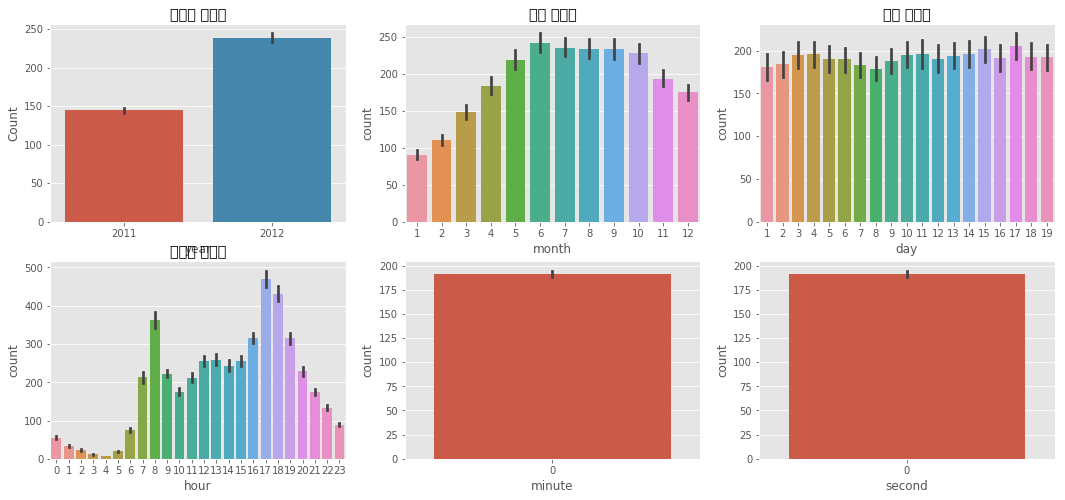

In [22]:
import seaborn as sns
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df_train, x="year", y="count", ax=ax1)
sns.barplot(data=df_train, x="month", y="count", ax=ax2)
sns.barplot(data=df_train, x="day", y="count", ax=ax3)
sns.barplot(data=df_train, x="hour", y="count", ax=ax4)
sns.barplot(data=df_train, x="minute", y="count", ax=ax5)
sns.barplot(data=df_train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

In [23]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(14)
memory usage: 1.5 MB


In [38]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [44]:
df_train['day'].value_counts()
# pd.Series(df_train['day'])

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

In [43]:
df_train['day'].count()

10886

In [45]:
10886/19

572.9473684210526

In [54]:
train_day=df_train['day'].value_counts()
df_day=pd.DataFrame(train_day)
# df_day
# df_day.sort_values

In [55]:
df_day.columns

Index(['day'], dtype='object')

In [58]:
df_day['day'].mean(), df_day['day'].var()

(572.9473684210526, 8.385964912280704)

In [61]:
np.random.normal(df_day['day'].mean(), 1, 12)

array([572.0071211 , 571.89322418, 572.62920527, 573.71708943,
       572.7913197 , 574.30555918, 573.08023262, 570.7171781 ,
       573.26187178, 573.48412726, 574.33232928, 571.74550932])

In [30]:
df_train['day'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        2
25        2
26        2
27        2
28        2
29        2
         ..
10856    18
10857    18
10858    18
10859    18
10860    18
10861    18
10862    19
10863    19
10864    19
10865    19
10866    19
10867    19
10868    19
10869    19
10870    19
10871    19
10872    19
10873    19
10874    19
10875    19
10876    19
10877    19
10878    19
10879    19
10880    19
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 10886, dtype: int64>

# 따르릉

In [26]:
df_test = pd.read_csv('./data/bikesharing_test.csv',parse_dates=["datetime"],encoding = 'utf-8')
df_test.shape

(6493, 9)

In [27]:
# 듀란듀란! 날짜 뽀개기
df_test["year"] = df_test["datetime"].dt.year
df_test["month"] = df_test["datetime"].dt.month
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour
df_test["minute"] = df_test["datetime"].dt.minute
df_test["second"] = df_test["datetime"].dt.second
df_test.shape

(6493, 15)

In [28]:
df_test['day'].unique

<bound method Series.unique of 0       20
1       20
2       20
3       20
4       20
5       20
6       20
7       20
8       20
9       20
10      20
11      20
12      20
13      20
14      20
15      20
16      20
17      20
18      20
19      20
20      20
21      20
22      20
23      20
24      21
25      21
26      21
27      21
28      21
29      21
        ..
6463    30
6464    30
6465    30
6466    30
6467    30
6468    30
6469    31
6470    31
6471    31
6472    31
6473    31
6474    31
6475    31
6476    31
6477    31
6478    31
6479    31
6480    31
6481    31
6482    31
6483    31
6484    31
6485    31
6486    31
6487    31
6488    31
6489    31
6490    31
6491    31
6492    31
Name: day, Length: 6493, dtype: int64>